## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
!pip install pandas_datareader

In [5]:
import pandas_datareader.data as web

In [7]:
AAPL = web.DataReader(name="AAPL", data_source='yahoo', start='2017-01-01', end='2018-12-31')

In [9]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.174755
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.144341
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.282375
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.586529
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.839203


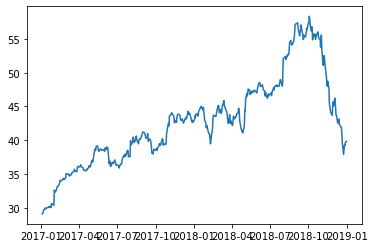

In [20]:
plt.plot(AAPL['High'])

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [19]:
q1 = np.quantile(AAPL['High'], 0.25)
q3 = np.quantile(AAPL['High'], 0.75)
iqr=q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
AAPL['High'][AAPL['High']<lower_bound], AAPL['High'][AAPL['High']>upper_bound]

(Series([], Name: High, dtype: float64),
 Series([], Name: High, dtype: float64))

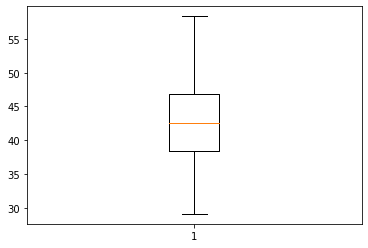

In [14]:
plt.boxplot(AAPL['High'])
plt.show()

выбросов нет

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [26]:
nms = [
    'waffle iron french toast',
    'zwetschgenkuchen bavarian plum cake',
    'lime tea'
]

In [22]:
data1 = np.load('average_ratings.npy')

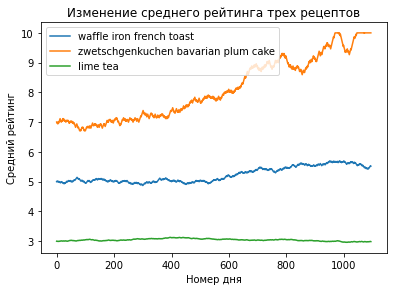

In [130]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plts = []
for y, name in zip(data1, nms):
    plts.append(ax.plot(y, label=name)[0])
ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend(handles=plts, loc='upper left')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [131]:
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2021-12-30')
dates = pd.date_range(start_date, end_date, freq='D')

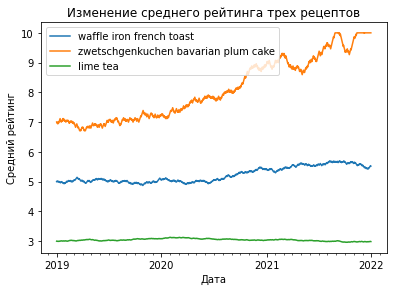

In [132]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plts = []
for y, name in zip(data1, nms):
    plts.append(ax.plot(dates, y, label=name)[0])
ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.legend(handles=plts, loc='upper left')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0.5, 0.01, 'Дата')

<Figure size 432x288 with 0 Axes>

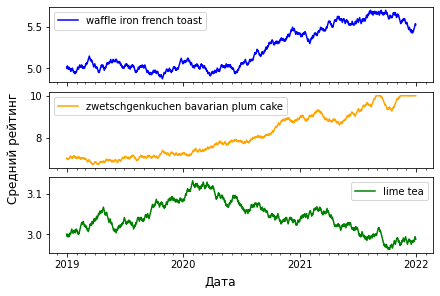

In [133]:
fig = plt.figure()
fig, axes = plt.subplots(nrows=3, layout="constrained", ncols=1, sharex='col')

for y, ax, name, color in zip(data1, axes, nms, ['b', 'orange', 'g']):
    ax.plot(dates, y, label=name, color=color)

    ax.legend(loc='best')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
fig.supylabel('Средний рейтинг')
fig.supxlabel('Дата')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [134]:
visitors = np.load('visitors.npy')

Text(0.5, 0.01, 'Количество дней с момента акции')

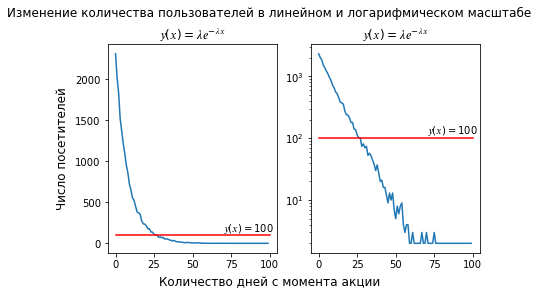

In [167]:
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained")
axes[0].plot(visitors)
axes[1].plot(visitors)
axes[1].set_yscale("log")
axes[0].text(70, 150, '$𝑦(𝑥)=100$')
axes[1].text(70, 120, '$𝑦(𝑥)=100$')
for ax in axes:
    ax.set_title('$𝑦(𝑥) = 𝜆𝑒^{−𝜆𝑥}$')
    ax.plot((0, visitors.shape[0]), (100,100), color='red')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
fig.supylabel('Число посетителей')
fig.supxlabel('Количество дней с момента акции')

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [175]:
reviews = pd.read_csv('reviews_sample.csv', parse_dates=[3], index_col=0)
reviews

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [177]:
recipes = pd.read_csv('recipes_sample.csv', parse_dates=[4])
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [186]:
short = recipes[recipes['minutes'] < 5]
normal = recipes[(5 <= recipes['minutes']) & (recipes['minutes'] < 50)]
long = recipes[recipes['minutes'] >= 50]

In [227]:
data5 = pd.DataFrame(
    [
        (
            item['n_steps'].fillna(item['n_steps'].mode()[0]).mean(),
            item.shape[0]
        ) for item in [short, normal, long]
    ],
    columns=["среднее количество шагов", "количество"],
    index=["короткие", "средние", "длинные"]
)

In [228]:
data5

,среднее количество шагов,количество
короткие,3.851852,675
средние,7.991992,17607
длинные,10.830090,11718


Text(0.5, 1.0, 'Размеры групп рецептов')

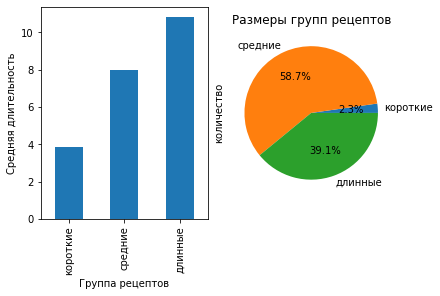

In [245]:
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained")
data5.iloc[:,0].plot.bar(ax=axes[0])
data5.iloc[:,1].plot.pie(ax=axes[1], autopct='%1.1f%%')
axes[0].set_xlabel("Группа рецептов")
axes[0].set_ylabel("Средняя длительность")
axes[1].set_title("Размеры групп рецептов")

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [259]:
data6 = reviews[reviews.date.dt.year.isin([2008,2009])]

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

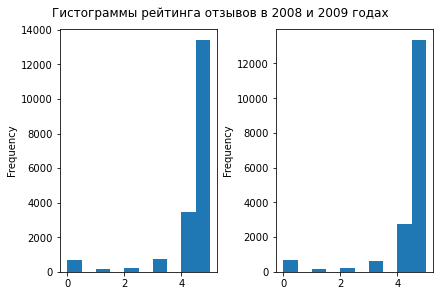

In [265]:
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained")
data6[data6.date.dt.year==2008]['rating'].plot.hist(ax=axes[0])
data6[data6.date.dt.year==2009]['rating'].plot.hist(ax=axes[1])
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [281]:
cat = []
for minute in recipes['minutes']:
    if minute<5: 
        cat.append("короткий") 
    elif minute>=50:
        cat.append("длинный")
    else:
        cat.append("средний")
recipes['category'] = cat

In [292]:
recipes.n_steps.fillna(recipes.n_steps.mode()[0], inplace=True)

In [294]:
recipes.n_ingredients.fillna(recipes.n_ingredients.mode()[0], inplace=True)

<AxesSubplot:xlabel='n_steps', ylabel='n_ingredients'>

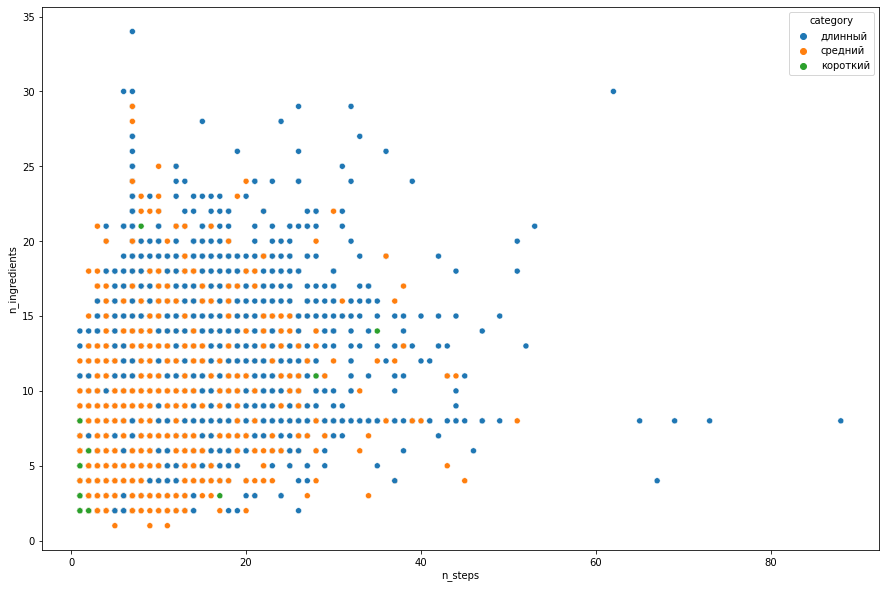

In [301]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(ax=ax,data=recipes, x='n_steps', y='n_ingredients', hue='category')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [329]:
result = recipes.merge(reviews, how='outer', left_on='id', right_on='recipe_id')
# result = result[["minutes", "n_steps", "n_ingredients","rating"]].fillna(0)

In [334]:
rating = result[["id", "rating"]].groupby("id").mean()

In [336]:
result = recipes.merge(rating, how='left', left_on="id", right_index=True)

In [338]:
result.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,category,rating
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,7.0,an original recipe created by chef scott meska...,18.0,длинный,5.000000
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,7.0,my children and their friends ask for my homem...,8.0,средний,5.000000
2,i can t believe it s spinach,38798,30,1533,2002-08-29,7.0,"these were so go, it surprised even me.",8.0,средний,3.666667
3,italian gut busters,35173,45,22724,2002-07-27,7.0,my sister-in-law made these for us at a family...,8.0,средний,4.000000
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,8.0,средний,4.000000


Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

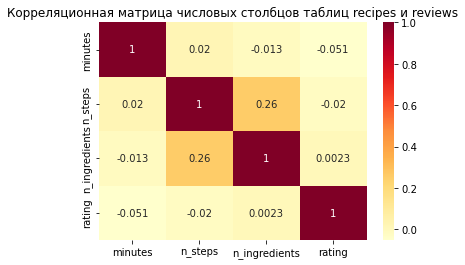

In [342]:
my_heatmap = sns.heatmap(
    result[["minutes", "n_steps", "n_ingredients","rating"]].corr(),
    annot=True,
    cmap='YlOrRd'
           )
my_heatmap.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')